In [38]:
import pandas as pd
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

# 깨짐 방지를 위한 Font 지정
import os
if os.name =='nt' : 
    font_family = "Malgun Gothic"
else :
    font_family = "AppleGothic"
""
# 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [39]:
import numpy as np # 벡터, 행렬 등 수치 연산을 수행하는 선형대수 라이브러리
import pandas as pd # 시리즈, 데이터프레임 포맷 데이터 처리를 위한 라이브러리
import warnings; warnings.filterwarnings(action='ignore') # 경고 메시지 무시
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import pickle # 객체 입출력을 위한 라이브러리
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier as RFC # 랜덤포레스트 분류 알고리즘
from sklearn.tree import DecisionTreeClassifier as DTC # 의사결정나무 분류 알고리즘
from sklearn.ensemble import GradientBoostingClassifier as GBC # 그래디언트 부스팅 분류 알고리즘
# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

In [40]:
gg = pd.read_csv('C:/Users/user/공공빅데이터_프로젝트/전처리데이터/전처리데이터_최종.csv', encoding = "euc-kr")
cor = pd.DataFrame(gg)
cor.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,충전소,시군구,시군구코드,총생산인구수,총인구수,공시지가,차고지개수,주차장개수,도시공원_개수,총생산,주유소개수
0,0,0,0,상암수소충전소,마포구,11440,269063,361126,9.212986e+06,0,17,9,19943128.0,12
1,1,1,1,마곡에코수소충전소,강서구,11500,412637,569517,4.485313e+06,1,21,20,17458926.0,33
2,2,2,2,오곡수소충전소,강서구,11500,412637,569517,4.485313e+06,1,21,20,17458926.0,33
3,3,3,3,H국회수소충전소,영등포구,11560,267893,369264,6.240179e+06,0,46,8,36095497.0,27
4,4,4,4,양재수소충전소,서초구,11650,285142,397098,1.114056e+07,0,22,0,35570338.0,30


In [41]:
del cor['Unnamed: 0']
del cor['Unnamed: 0.1']
del cor['Unnamed: 0.2']
cor

,충전소,시군구,시군구코드,총생산인구수,총인구수,공시지가,차고지개수,주차장개수,도시공원_개수,총생산,주유소개수
0,상암수소충전소,마포구,11440,269063,361126,9.212986e+06,0,17,9,19943128.0,12
1,마곡에코수소충전소,강서구,11500,412637,569517,4.485313e+06,1,21,20,17458926.0,33
2,오곡수소충전소,강서구,11500,412637,569517,4.485313e+06,1,21,20,17458926.0,33
3,H국회수소충전소,영등포구,11560,267893,369264,6.240179e+06,0,46,8,36095497.0,27
4,양재수소충전소,서초구,11650,285142,397098,1.114056e+07,0,22,0,35570338.0,30
...,...,...,...,...,...,...,...,...,...,...,...
108,하이넷 통영용남수소충전소,통영시,48220,81212,124236,2.569437e+05,1,18,11,3096258.0,31
109,김해수소충전소,김해시,48250,386937,527523,4.811262e+05,3,42,31,16058319.0,177
110,하이넷 거제장평수소충전소,거제시,48310,169504,237546,3.297274e+05,0,8,15,9535962.0,52
111,양산시증산수소충전소,양산시,48330,244781,349290,4.314398e+05,1,21,28,10952945.0,75


In [42]:
Hyd = pd.read_csv('C:/Users/user/공공빅데이터_프로젝트/전국시군구데이터_전처리용/전국시군구_수소충전소개수.csv', encoding = "euc-kr")
Hyd_df = pd.DataFrame(Hyd)
Hyd_df.head()

,시군구코드,수소충전소개수
0,31710,4
1,41590,4
2,28110,3
3,41550,3
4,31140,3


In [43]:
cor = pd.merge(cor, Hyd_df, on = '시군구코드', how = 'left')
cor

,충전소,시군구,시군구코드,총생산인구수,총인구수,공시지가,차고지개수,주차장개수,도시공원_개수,총생산,주유소개수,수소충전소개수
0,상암수소충전소,마포구,11440,269063,361126,9.212986e+06,0,17,9,19943128.0,12,1
1,마곡에코수소충전소,강서구,11500,412637,569517,4.485313e+06,1,21,20,17458926.0,33,2
2,오곡수소충전소,강서구,11500,412637,569517,4.485313e+06,1,21,20,17458926.0,33,2
3,H국회수소충전소,영등포구,11560,267893,369264,6.240179e+06,0,46,8,36095497.0,27,1
4,양재수소충전소,서초구,11650,285142,397098,1.114056e+07,0,22,0,35570338.0,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...
108,하이넷 통영용남수소충전소,통영시,48220,81212,124236,2.569437e+05,1,18,11,3096258.0,31,1
109,김해수소충전소,김해시,48250,386937,527523,4.811262e+05,3,42,31,16058319.0,177,1
110,하이넷 거제장평수소충전소,거제시,48310,169504,237546,3.297274e+05,0,8,15,9535962.0,52,1
111,양산시증산수소충전소,양산시,48330,244781,349290,4.314398e+05,1,21,28,10952945.0,75,1


In [44]:
del cor['시군구코드']
del cor['충전소']
del cor['시군구']

In [45]:
cor.fillna(0)

,총생산인구수,총인구수,공시지가,차고지개수,주차장개수,도시공원_개수,총생산,주유소개수,수소충전소개수
0,269063,361126,9.212986e+06,0,17,9,19943128.0,12,1
1,412637,569517,4.485313e+06,1,21,20,17458926.0,33,2
2,412637,569517,4.485313e+06,1,21,20,17458926.0,33,2
3,267893,369264,6.240179e+06,0,46,8,36095497.0,27,1
4,285142,397098,1.114056e+07,0,22,0,35570338.0,30,1
...,...,...,...,...,...,...,...,...,...
108,81212,124236,2.569437e+05,1,18,11,3096258.0,31,1
109,386937,527523,4.811262e+05,3,42,31,16058319.0,177,1
110,169504,237546,3.297274e+05,0,8,15,9535962.0,52,1
111,244781,349290,4.314398e+05,1,21,28,10952945.0,75,1


In [46]:
cor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 112
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   총생산인구수   113 non-null    int64  
 1   총인구수     113 non-null    int64  
 2   공시지가     113 non-null    float64
 3   차고지개수    113 non-null    int64  
 4   주차장개수    113 non-null    int64  
 5   도시공원_개수  113 non-null    int64  
 6   총생산      113 non-null    float64
 7   주유소개수    113 non-null    int64  
 8   수소충전소개수  113 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 8.8 KB


In [47]:
cor.target = cor['수소충전소개수']
print(cor.shape)
cor.head()

(113, 9)


,총생산인구수,총인구수,공시지가,차고지개수,주차장개수,도시공원_개수,총생산,주유소개수,수소충전소개수
0,269063,361126,9.212986e+06,0,17,9,19943128.0,12,1
1,412637,569517,4.485313e+06,1,21,20,17458926.0,33,2
2,412637,569517,4.485313e+06,1,21,20,17458926.0,33,2
3,267893,369264,6.240179e+06,0,46,8,36095497.0,27,1
4,285142,397098,1.114056e+07,0,22,0,35570338.0,30,1


In [48]:
# 각 변수 p-value 0.05 미만 제거
# 변수 선택
feature_columns = list(cor.columns.difference(['수소충전소개수']))

# 변수 확정
X = cor[feature_columns] # 설명변수

## 스케일링 & 정규화
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

## 데이터 생성
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_std,
                                                       cor.target,
                                                       test_size = 0.2,
                                                       random_state = 20)

In [49]:
feature_columns

['공시지가', '도시공원_개수', '주유소개수', '주차장개수', '차고지개수', '총생산', '총생산인구수', '총인구수']

In [50]:
X_train_b[0]

array([-0.13933536, -0.47174735, -0.25698498, -0.01482665,  0.73288593,
       -0.35670665, -0.61823171, -0.64185392])

In [51]:
y_train_b[0]

KeyError: 0

In [54]:
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error

rf_refressor = RandomForestRegressor(random_state = 5,
                                    max_depth = 2,
                                    min_samples_split = 8,
                                    n_estimators = 10)


rf_refressor.fit(X_train_b, y_train_b)

## 성능평가
# R2 Score
print("R2 Socre:", rf_refressor.score(X_train_b, y_train_b, sample_weight = None))

# train rmse
train_predict = rf_refressor.predict(X_train_b)
print("train RMSE : {}".format(sqrt(mean_squared_error(train_predict,y_train_b)))) # RMSE 결과

# test rmse
test_predict = rf_refressor.predict(X_test_b)
print("test RMSE : {}".format(sqrt(mean_squared_error(test_predict,y_test_b))))

R2 Socre: 0.509599978789214
train RMSE : 0.6731310439385247
test RMSE : 0.8231115654072139


In [60]:
# 하이퍼 파라미터 조정
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error

rf_refressor = RandomForestRegressor(random_state = 5,
                                    max_depth = 7,
                                    min_samples_split = 8,
                                    n_estimators = 100)


rf_refressor.fit(X_train_b, y_train_b)

## 성능평가
# R2 Score
print("R2 Socre:", rf_refressor.score(X_train_b, y_train_b, sample_weight = None))

# train rmse
train_predict = rf_refressor.predict(X_train_b)
print("train RMSE : {}".format(sqrt(mean_squared_error(train_predict,y_train_b)))) # RMSE 결과

# test rmse
test_predict = rf_refressor.predict(X_test_b)
print("test RMSE : {}".format(sqrt(mean_squared_error(test_predict,y_test_b))))

R2 Socre: 0.8705579364386742
train RMSE : 0.34582954548447037
test RMSE : 0.5982780963216828


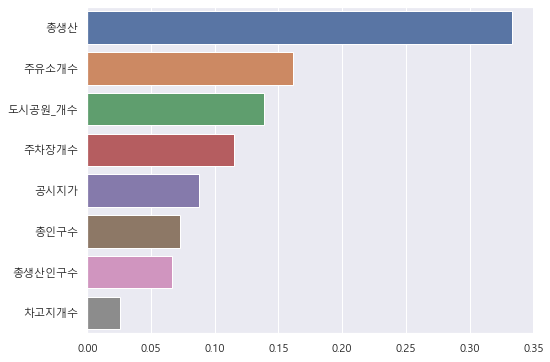

In [62]:
## 변수 중요도 시각화

ftr_importances_value = rf_refressor.feature_importances_

ftr_importances = pd.Series(ftr_importances_value, index = feature_columns)

ftr_top = ftr_importances.sort_values(ascending  = False)

plt.figure(figsize = (8,6))
sns.barplot(x = ftr_top, y= ftr_top.index)
plt.show()

In [64]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train_b,y_train_b)
pred = rf_clf.predict(X_test_b)
accuracy = accuracy_score(y_test_b, pred)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9130
